In [2]:
from astropy.table import Table, join, hstack
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u

path_euclid = '/Users/marchuertascompany/Documents/data/EUCLID/validation'
path_cosmos = '/Users/marchuertascompany/Documents/data/AI4PhysHack'

# Load the FITS tables
table1 = Table.read(path_cosmos + "/COSMOS_web_galaxies/cd3_catalog.fits")
ascii_table = Table.read(
    path_euclid + "/COSMOS_ACS814_Griggith12.tsv",
    format='ascii',
    data_start=76,  # Specify the line where the data starts
    delimiter=';',
    names=[
        'ObjNo', 'RAJ2000', 'DEJ2000', 'f1', 'f2', 'Imaging', 'z', 'umag', 'gmag', 'rmag',
        'imag', 'Class', 'mu1', 'mu2', 'Sf1', 'Gf1', 's/g1', 's/g2', 'mGal1', 'e_mGal1',
        'mGal2', 'e_mGal2', 'Re.G1', 'e_Re.G1', 'Re.G2', 'e_Re.G2', 'n.G1', 'e_n.G1', 'n.G2',
        'e_n.G2', 'b/a.G1', 'e_b/a.G1', 'b/a.G2', 'e_b/a.G2', 'pa.G1', 'e_pa.G1', 'pa.G2',
        'e_pa.G2'
    ]
)


coord_table1 = SkyCoord(ra=table1['RA'], dec=table1['Dec'], unit=(u.deg, u.deg))
coord_ascii_table = SkyCoord(ra=ascii_table['RAJ2000'], dec=ascii_table['DEJ2000'], unit=(u.deg, u.deg))

# Find the nearest on-sky matches
idx, sep, _ = match_coordinates_sky(coord_table1, coord_ascii_table)

# Select the best matching rows from the ASCII table using positional indexing
matched_ascii_rows = ascii_table[idx]

# Combine the matched rows with the result_table using hstack
result_table = hstack([table1, matched_ascii_rows], join_type='inner')

# Save the resulting table to a new FITS file
#result_table.write("matched_tables_with_ascii.fits", format="fits")

In [26]:
res_table_pandas = result_table.to_pandas()
res_table_pandas['sep']=sep.value

In [25]:
print(sep.value)

[4.71029015e-04 2.18906689e-04 3.88990111e-04 ... 2.44329539e-05
 5.69169158e-04 1.20686899e-03]


In [15]:
res_table_pandas.columns

Index(['ID', 'RA', 'Dec', 'z_1', 'ObjNo', 'RAJ2000', 'DEJ2000', 'f1', 'f2',
       'Imaging', 'z_2', 'umag', 'gmag', 'rmag', 'imag', 'Class', 'mu1', 'mu2',
       'Sf1', 'Gf1', 's/g1', 's/g2', 'mGal1', 'e_mGal1', 'mGal2', 'e_mGal2',
       'Re.G1', 'e_Re.G1', 'Re.G2', 'e_Re.G2', 'n.G1', 'e_n.G1', 'n.G2',
       'e_n.G2', 'b/a.G1', 'e_b/a.G1', 'b/a.G2', 'e_b/a.G2', 'pa.G1',
       'e_pa.G1', 'pa.G2', 'e_pa.G2', 'sep'],
      dtype='object')

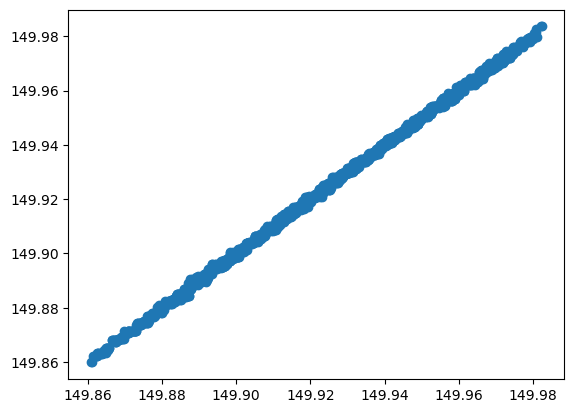

In [16]:
import matplotlib.pyplot as plt
plt.scatter(res_table_pandas.RA,res_table_pandas.RAJ2000)

In [27]:
print(res_table_pandas.sep.values[0:10])

[4.71029015e-04 2.18906689e-04 3.88990111e-04 5.88069581e-04
 5.09798154e-04 9.19611141e-05 1.23799489e-04 5.93818231e-04
 4.20650588e-04 4.97329956e-04]


In [28]:
res_table_pandas.to_csv(path_cosmos+"/COSMOS_web_galaxies/cd3_catalog_sizes.csv")